# P7: Predictive ML Project (Module 7)

**Author:** Abdelhafidh Mahouel  
**Repo:** https://github.com/AbdelhafidhMahouel/datafun-07-ml

In [39]:
# Imports (place all imports near the top, per instructions)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 – Chart a Straight Line

### Section 1 – Create Data (Celsius vs Fahrenheit)

This is a simple example to practice the line equation **y = mx + b**.

In [40]:
# Create a small DataFrame of Celsius values and compute Fahrenheit
celsius = pd.Series(range(0, 101, 10))
fahrenheit = (celsius * 9/5) + 32

cf_df = pd.DataFrame({"Celsius": celsius, "Fahrenheit": fahrenheit})
cf_df.head()

,Celsius,Fahrenheit
0,0,32.0
1,10,50.0
2,20,68.0
3,30,86.0
4,40,104.0


### Section 2 – Visualize the Line

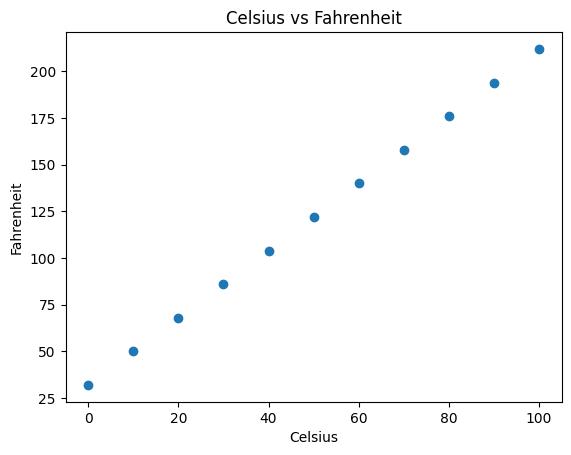

In [41]:
# Scatter plot and line plot
plt.figure()
plt.scatter(cf_df["Celsius"], cf_df["Fahrenheit"])
plt.title("Celsius vs Fahrenheit")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.show()

## Part 2 – Prediction

### Section 1 – Data Acquisition

In [42]:
# Load NYC January average high temperatures dataset
# NOTE: put the csv file in a folder named 'data' at the project root
# File name used in the course instructions:
#   data/ave_hi_nyc_jan_1895-2018.csv

nyc_df = pd.read_csv("data/ave_hi_nyc_jan_1895-2018.csv")
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2 – Data Inspection

In [43]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [44]:
nyc_df.dtypes

Date         int64
Value      float64
Anomaly    float64
dtype: object

### Section 3 – Data Cleaning

In [45]:
# Improve column names (matches common textbook style)
# If your CSV already has these columns, this will overwrite them consistently.
nyc_df.columns = ["Date", "Temperature", "Anomaly"]

# Convert 6-digit YYYYMM to 4-digit YYYY
# Example: 189501 -> 1895
nyc_df["Date"] = nyc_df["Date"].floordiv(100)

nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 – Descriptive Statistics

In [46]:
pd.set_option("display.precision", 2)
nyc_df["Temperature"].describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 – Build the Model

In [47]:
# SciPy linear regression (best-fit line)
linear_regression = stats.linregress(x=nyc_df["Date"], y=nyc_df["Temperature"])
linear_regression.slope, linear_regression.intercept

(np.float64(0.014771361132966163), np.float64(8.694993233674289))

### Section 6 – Predict

In [48]:
# Predict the average high temp for January in NYC for year 2024
pred_2024_scipy = (linear_regression.slope * 2024) + linear_regression.intercept
pred_2024_scipy

np.float64(38.5922281667978)

### Section 7 – Visualizations

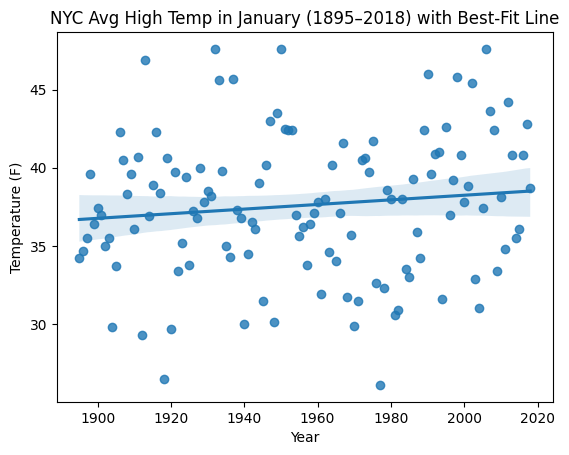

In [49]:
# Scatter + best-fit line with seaborn
plt.figure()
sns.regplot(data=nyc_df, x="Date", y="Temperature", line_kws={"label": "Best-Fit Line"})
plt.title("NYC Avg High Temp in January (1895–2018) with Best-Fit Line")
plt.xlabel("Year")
plt.ylabel("Temperature (F)")
plt.show()

## Part 3 – Prediction

### Section 1 – Build the Model

In [50]:
# scikit-learn approach (train/test split)
X = nyc_df[["Date"]]
y = nyc_df["Temperature"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

model.coef_[0], model.intercept_

(np.float64(0.012012881619082094), np.float64(13.793889941887283))

### Section 2 – Test the Model

In [51]:
# R^2 score on the test set
test_score = model.score(X_test, y_test)
test_score

-0.06673117103126835

### Section 3 – Predict

In [52]:
# Predict for 2024 using a DataFrame (helps avoid sklearn feature-name warnings)
future = pd.DataFrame({"Date": [2024]})
pred_2024_sklearn = model.predict(future)[0]
pred_2024_sklearn

np.float64(38.107962338909445)

### Section 4 – Visualizations

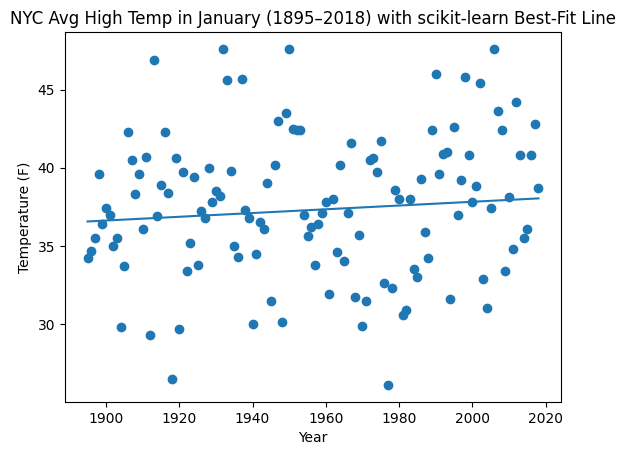

In [53]:
# Plot data + sklearn best-fit line
plt.figure()
plt.scatter(nyc_df["Date"], nyc_df["Temperature"])

# Create line for the full date range
x_line = pd.DataFrame({"Date": sorted(nyc_df["Date"].unique())})
y_line = model.predict(x_line)

plt.plot(x_line["Date"], y_line)
plt.title("NYC Avg High Temp in January (1895–2018) with scikit-learn Best-Fit Line")
plt.xlabel("Year")
plt.ylabel("Temperature (F)")
plt.show()

## Part 4 – Insights

In Part 2, I used SciPy (`stats.linregress`) to compute the slope and intercept directly. This method feels very transparent because I can immediately see the line equation values and use them in the formula for prediction.

In Part 3, I used scikit-learn (`LinearRegression`) with a training/testing split. I liked this approach because it matches typical machine learning workflow: train the model, test it with unseen data, and measure performance using the model score.

Both approaches produce similar predictions, but the scikit-learn method is easier to extend to more features in future projects (not just one x-value like year). The SciPy method is great for a fast, simple regression and understanding the math behind it.